**Oppgaver 7.1**

*1. Plott en figur som likner på Fig 1 i Stewart Links to an external site.. Gjør deloppgave a og b*

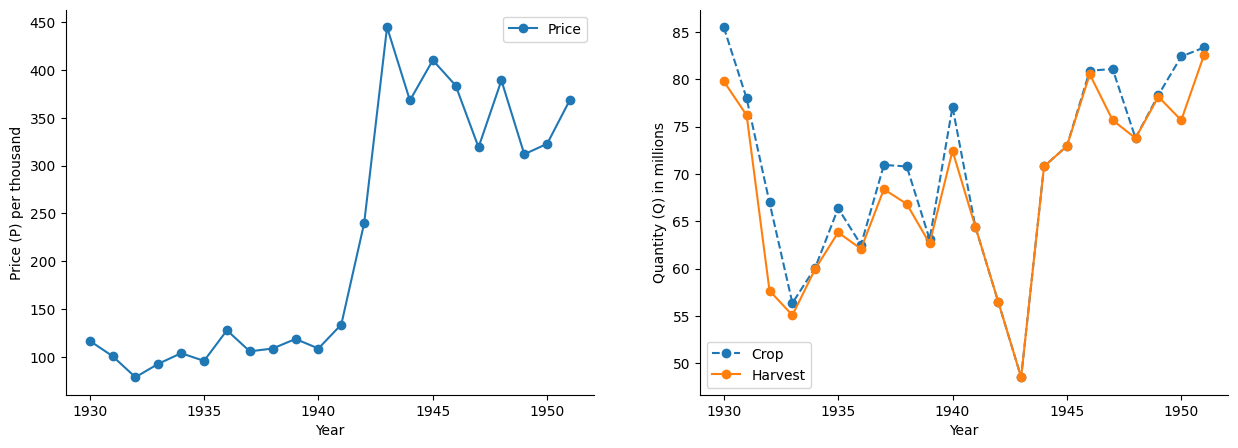

In [1]:
#  importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Import data from URL with the correct delimiter
df = pd.read_csv("https://uit-sok-1006-v23.github.io/data/suits_watermelons.csv", delimiter=";")

# Create new variables
df['p'] = np.exp(df.iloc[:,3])
df['h'] = np.exp(df.iloc[:,2])
df['q'] = np.exp(df.iloc[:,1])


# making figure as a function
def oppgave7_1():
                fig, ax = plt.subplots(1, 2, figsize=(15, 5))
                for i in range(2):
                     ax[i].set_xlabel('Year')
                     ax[i].spines['top'].set_color('none')
                     ax[i].spines['right'].set_color('none')
                return fig, ax
        
# Plotting figure 1
fig, ax = oppgave7_1()
ax[0].plot(df.iloc[:,0], df['p'], 'o-', label='Price')
ax[0].set_ylabel('Price (P) per thousand')
ax[0].legend()
# plotting figure 2
ax[1].plot(df.iloc[:,0], df['q'], 'o--', label='Crop')
ax[1].plot(df.iloc[:,0], df['h'], 'o-', label='Harvest')
ax[1].set_ylabel('Quantity (Q) in millions')
ax[1].legend()
# showing figure
plt.show(block=False)

*2. Tegn tilbud og etterspørsel. Deloppgave a, b, c , d.*

In [82]:
# Number of watermelons in millions defined in Q
Q =  np.arange(20,105,5)

# Calculate the log of the quantity
log_q=np.log(Q)

# Define the supply function
def supply():
        return -2.0+1.7*log_q

# Define the demand function
def demand():
        return 8.5-0.82*log_q

# Define a dataframe with the quantity
df2 = pd.DataFrame(Q, columns=['Q'])

# Add the log of the quantity to the dataframe
df2['log_q']=log_q

# Add the supply function to the dataframe
df2['supply_log_p']= supply()
    
# Add the demand function to the dataframe
df2['demand_log_p']= demand()

# convert supply log prices to prices and add to the dataframe
df2['supply_p']=np.exp(df2['supply_log_p'])

# convert demand log prices to prices and add to the dataframe
df2['demand_p']=np.exp(df2['demand_log_p'])

# Showing the dataframe
print(df2)

      Q     log_q  supply_log_p  demand_log_p    supply_p    demand_p
0    20  2.995732      3.092745      6.043500   22.037485  421.365040
1    25  3.218876      3.472089      5.860522   32.203943  350.907208
2    30  3.401197      3.782036      5.711018   43.905322  302.178574
3    35  3.555348      4.044092      5.584615   57.059336  266.297629
4    40  3.688879      4.271095      5.475119   71.600000  238.678832
5    45  3.806662      4.471326      5.378537   87.472655  216.704952
6    50  3.912023      4.650439      5.292141  104.630920  198.768561
7    55  4.007333      4.812466      5.213987  123.034698  183.825472
8    60  4.094345      4.960386      5.142637  142.648813  171.166618
9    65  4.174387      5.096458      5.077002  163.442028  160.292847
10   70  4.248495      5.222442      5.016234  185.386329  150.842146
11   75  4.317488      5.339730      4.959660  208.456376  142.545286
12   80  4.382027      5.449445      4.906738  232.629086  135.197701
13   85  4.442651   

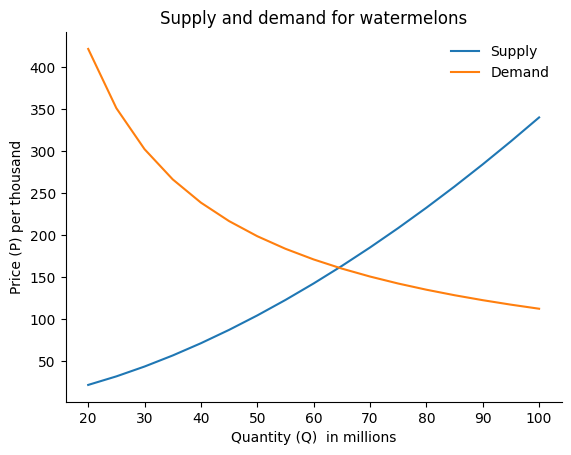

In [83]:
# Plot the supply and demand functions
fig, ax = plt.subplots()
ax.plot(df2['Q'], df2['supply_p'], label='Supply')
ax.plot(df2['Q'], df2['demand_p'], label='Demand')
ax.legend(loc='best',frameon=False)
ax.set_xlabel('Quantity (Q)  in millions')
ax.set_ylabel('Price (P) per thousand')
ax.set_title("Supply and demand for watermelons")
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

*3. Tegn inn et shock til tilbud. Deloppgave a og b (IKKE c)*

In [86]:
# new supply shock function
def new_supply():
    return -2.0+1.7*log_q+0.4

# add new supply shock log to dataframe
df2['new_supply_log_p']= new_supply()

# add new supply shock prices to dataframe
df2['new_supply_p'] = np.exp(new_supply())

df2

,Q,log_q,supply_log_p,demand_log_p,supply_p,demand_p,new_supply_log_p,new_supply_p
0,20,2.995732,3.092745,6.043500,22.037485,421.365040,3.492745,32.876064
1,25,3.218876,3.472089,5.860522,32.203943,350.907208,3.872089,48.042638
2,30,3.401197,3.782036,5.711018,43.905322,302.178574,4.182036,65.499044
3,35,3.555348,4.044092,5.584615,57.059336,266.297629,4.444092,85.122526
4,40,3.688879,4.271095,5.475119,71.600000,238.678832,4.671095,106.814648
5,45,3.806662,4.471326,5.378537,87.472655,216.704952,4.871326,130.493867
6,50,3.912023,4.650439,5.292141,104.630920,198.768561,5.050439,156.090990
7,55,4.007333,4.812466,5.213987,123.034698,183.825472,5.212466,183.546201
8,60,4.094345,4.960386,5.142637,142.648813,171.166618,5.360386,212.807022
9,65,4.174387,5.096458,5.077002,163.442028,160.292847,5.496458,243.826854


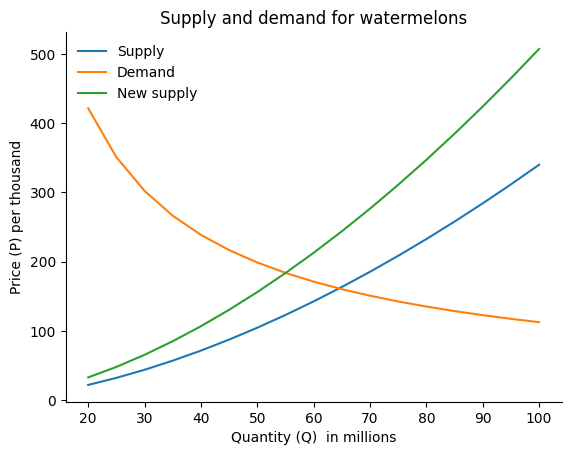

In [85]:
# add new supply prices to dataframe
ax.plot(df2['Q'], df2['new_supply_p'], label='New supply')
ax.legend(loc='best',frameon=False)
display(fig)

**Oppgaver i 7.2**

*1. Beregn priselastisitene. Deloppgave a og b*

In [87]:
log_p, log_q = sp.symbols('log_q, log_p', real=True, positive=True)

def eq():
    return sp.Eq(-2+1.7*log_q, log_p)

eq()
# 1/1.7

Eq(1.7*log_p - 2, log_q)

In [88]:
sp.solve(eq())

[{log_p: 0.588235294117647*log_q + 1.17647058823529}]

Priselastisiteten er uelastisk ettersom en 1% endring i pris gir en 0.588% endring i tilbud

In [89]:
def eq2():
    return sp.Eq(8.5-0.82*log_q, log_p)

eq2()
#-1/0.82

Eq(8.5 - 0.82*log_p, log_q)

In [90]:
sp.solve(eq2())

[{log_p: 10.3658536585366 - 1.21951219512195*log_q}]

Priselastisiteten er elastisk ettersom en 1% endring i pris gir en -1.219% endring i etterspørsel

**2. Tolk estimatene i tilbudslikningen (Coefficient). IKKE bry deg om "95% confidence interval"**

Koeffisienten 0.580 vil si at økning på 1% i prisen vil føre til en økning på 0.58% i tilbud av vannmeloner.

En økning på 1% i prisen til bomull vil føre til en reduksjon på -0.321% i tilbud av vannmeloner.

En økning på 1% i prisen til grønnsaker vil føre til en reduksjon på -0.124% i tilbud av vannmeloner.

En økning på 1% i prisen i dummy variablen vil føre til en økning på 0.073% i tilbud av vannmeloner.

Andre verdenskrig førte til en -0.36% reduksjon i tilbudet på vannmeloner.

**3. Tolk estimatene i etterspørselslikningen**

En økning på 1% i pris vil gi en endret etterspørsel på -1.125% i etterspørselen for vannmeloner.

En økning på 1% i inntekt vil gi en endret etterspørsel på 1.75% i etterspørselen for vannmeloner.

En økning på 1% i jernbanefraktkostnader vil gi en endret etterspørsel på -0.968% i etterspørsel for vannmeloner.

**4. Gi eksempler på shock**

Andre verdenskrig - etterspørselen på vannmeloner var like mye når krigen brøt ut men tilbudet ble endret fordi gårder måtte produsere andre varer enn vannmeloner.

Populasjonsendring - etterspørselen på vannmeloner vil øke fordi flere mennesker vil kjøpe vannmeloner.
